# Bank Marketing Dataset

## Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')


In [1]:
# Import Package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

import sklearn.linear_model as linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

# Data Overview and Preprocessing
Data Overview incluses:
- Read database

Preprocessing included:
- Drop unused columns or those that cannot be used on the statistics (e.g., all value is unique for every entry, the definition of the column is unclear, and the column values are empty)
- Convert data to 'ready-to-process' types, for example converting area values from string or object to integer-

In [2]:
# read databases
df_bank_train = pd.read_csv('bank-additional-full.csv', delimiter=";")
df_bank_test = pd.read_csv('bank-additional.csv', delimiter=";")

print('Train dataset')
df_bank_train.info()
df_bank_train.head()

print('')
print('Test dataset')
df_bank_test.info()
df_bank_test.head()

Train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
# Drop unecessary columns
df_bank_train = df_bank_train.drop(columns=['duration'])
df_bank_test = df_bank_test.drop(columns=['duration'])

In [4]:
df_bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_bank_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
# Categorise column name by data-type
columns_numeric = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
columns_bool = ['y']

columns_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [7]:
# Transform categorical data to numeric
le = preprocessing.LabelEncoder()

for col in columns_categorical:
    df_bank_train[col] = le.fit_transform(df_bank_train[col])
    df_bank_test[col] = le.fit_transform(df_bank_test[col])

In [8]:
# Transform binary data to boolean
for col in columns_bool:
    df_bank_train.loc[df_bank_train[col]=='no', col] = 0
    df_bank_train.loc[df_bank_train[col]=='yes', col] = 1

    df_bank_test.loc[df_bank_test[col]=='no', col] = 0
    df_bank_test.loc[df_bank_test[col]=='yes', col] = 1

In [9]:
# Remove unknown result
df_bank_train = df_bank_train[df_bank_train[col].isin([0,1])]
df_bank_test = df_bank_test[df_bank_test[col].isin([0,1])]

In [10]:
# Assign x_train and y_train
x_bank_arr = df_bank_train[columns_features].to_numpy()
x_train = x_bank_arr

y_bank_arr = df_bank_train['y'].astype('int')
y_bank_arr = y_bank_arr.to_numpy()
y_train = y_bank_arr

In [11]:
# Assign x_test and y_test
x_bank_arr = df_bank_test[columns_features].to_numpy()
x_test = x_bank_arr

y_bank_arr = df_bank_test['y'].astype('int')
y_bank_arr = y_bank_arr.to_numpy()
y_test = y_bank_arr

# Data Model
## Logistic Regression

In [12]:
model_regression = linear_model.LogisticRegression()
model_regression.fit(x_train,y_train)
y_predict = model_regression.predict(x_test)
print('score regression is',model_regression.score(x_train,y_train))

score regression is 0.8995824026415461


C:\Users\3271117\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


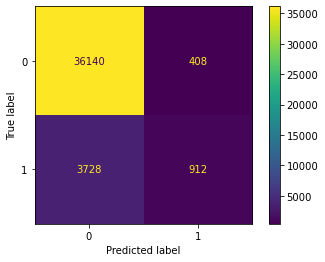

In [13]:
plot_confusion_matrix(model_regression, x_train, y_train)

## K-Nearest Neighbors

Text(0, 0.5, 'Error mean')

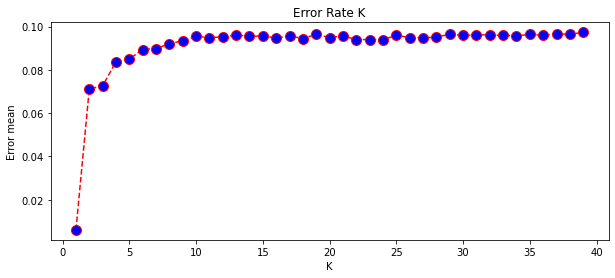

In [14]:
# Find best n_neighbors value
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

#### Result:
Based on the Error Rate K figure, a K-value is decided at 2 

In [15]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train, y_train)
y_predict = model_knn.predict(x_test)
print('score knn is',model_knn.score(x_train,y_train))

score knn is 0.9245411284840245


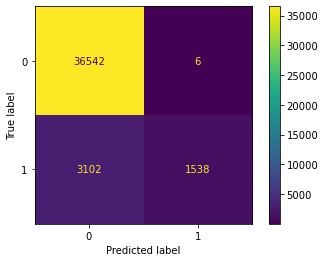

In [16]:
plot_confusion_matrix(model_knn, x_train, y_train)

## Support Vector Machine

In [17]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)
y_predict = model_svm.predict(x_test)
print('score svm is',model_svm.score(x_train,y_train))

score svm is 0.8977372050111683


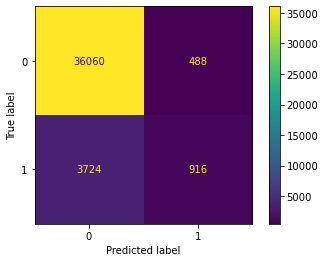

In [18]:
plot_confusion_matrix(model_svm, x_train, y_train)

## Decision Tree

In [19]:
# Best parameter search
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 1}

In [20]:
model_dct = DecisionTreeClassifier(max_depth=1, criterion='entropy')
model_dct.fit(x_train, y_train)
y_predict = model_dct.predict(x_test)
print('score dct is',model_dct.score(x_train,y_train))

score dct is 0.8873458288821987


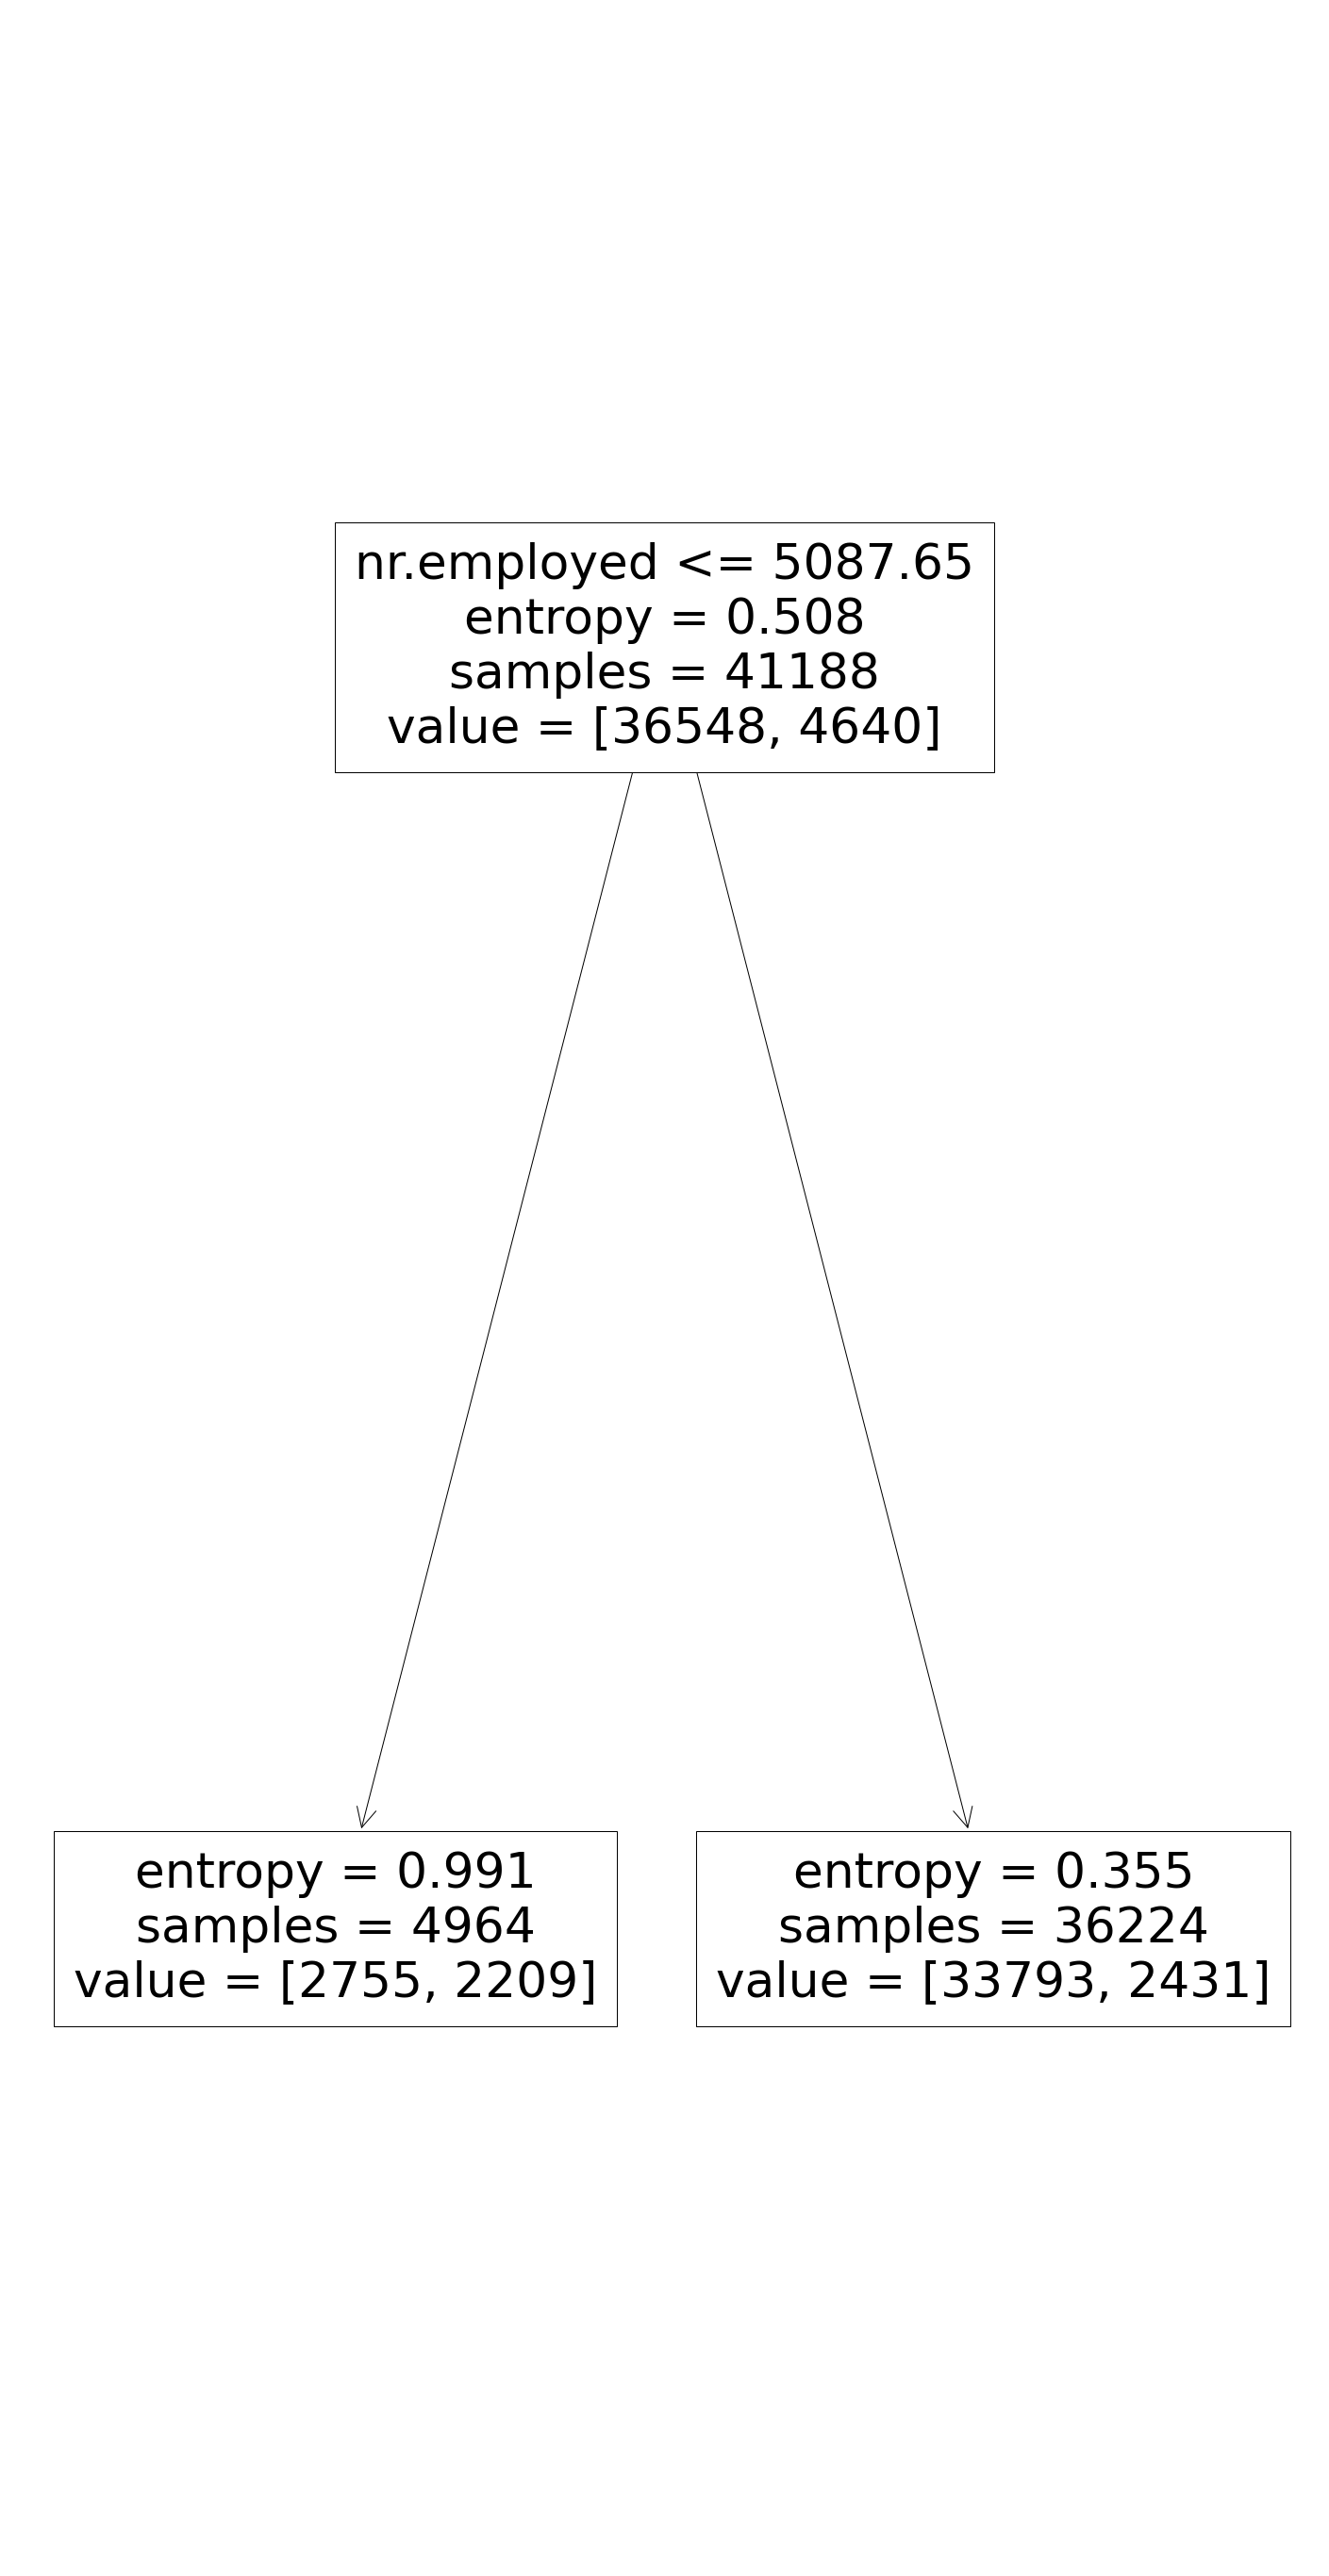

In [21]:
# Print Decision Tree
fig, ax = plt.subplots(figsize=(25,50))
tree.plot_tree(model_dct, ax=ax, feature_names=columns_features)
plt.show()

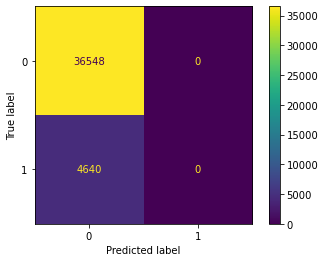

In [22]:
plot_confusion_matrix(model_dct, x_train, y_train)

## Random Forest

In [23]:
model_rdf = RandomForestClassifier(max_depth=3, criterion='entropy')
model_rdf.fit(x_train, y_train)
y_predict = model_rdf.predict(x_test)
print('score rdf is',model_rdf.score(x_train,y_train))

score rdf is 0.8993396134796543


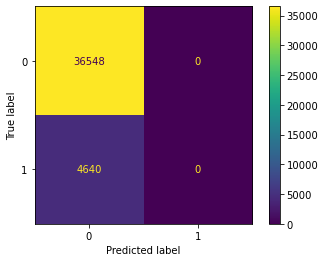

In [24]:
plot_confusion_matrix(model_dct, x_train, y_train)

## Naive Bayes and Confusion Matrix

In [25]:
model_nbg = GaussianNB()
model_nbg.fit(x_train, y_train)
y_predict = model_nbg.predict(x_test)
print('score nbg is',model_nbg.score(x_train,y_train))

score nbg is 0.8344663494221618


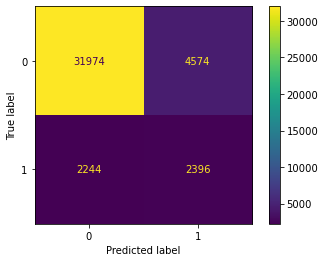

In [26]:
plot_confusion_matrix(model_nbg, x_train, y_train)

## Best Model Decision

In [27]:
# Score calculation
list_model = [
    model_regression,
    model_knn,
    model_svm,
    model_dct,
    model_rdf,
    model_nbg
]

result = []

for mod in list_model:
    a = mod.fit(x_train, y_train)
    b = mod.score(x_train, y_train)
    c = mod.score(x_test, y_test)
    
    result.append(
        {
            mod: {
                'score_train': b,
                'score_test': c
            }
        })
    
result

C:\Users\3271117\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[{LogisticRegression(): {'score_train': 0.8995824026415461,
   'score_test': 0.9019179412478757}},
 {KNeighborsClassifier(n_neighbors=2): {'score_train': 0.9245411284840245,
   'score_test': 0.928866229667395}},
 {SVC(kernel='linear'): {'score_train': 0.8977372050111683,
   'score_test': 0.8999757222626851}},
 {DecisionTreeClassifier(criterion='entropy', max_depth=1): {'score_train': 0.8873458288821987,
   'score_test': 0.890507404709881}},
 {RandomForestClassifier(criterion='entropy', max_depth=3): {'score_train': 0.8991453821501408,
   'score_test': 0.9024034959941734}},
 {GaussianNB(): {'score_train': 0.8344663494221618,
   'score_test': 0.8327263899004613}}]

##### Result:
Based on the scories above, the best model for Bank Marketing Dataset in the K-Nearest Neighbors (KNN) with n_neighbor value of 2.
The effort to get the best parameters either using Grid Search CV or Error Rate K improves the score of the model

# Overall Conclusion
- Logistic Regression = 0.8995824026415461
- KNeighbors Classifier = 0.9245411284840245
- Support Vector Machine = 0.8977372050111683
- Decision Tree = 0.8873458288821987
- Random Forest = 0.8993638923958435
- Naive Bayes = 0.8344663494221618

The KNeighbor Classifier should be choosen as the highest score in classification method.